# Module

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
%load_ext autoreload
%autoreload 2
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
from src.cv.Model import model_builder_dict

/home/guohua/anaconda3/envs/machine_learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/guohua/anaconda3/envs/machine_learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/guohua/anaconda3/envs/machine_learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/guohua/ana

# Config 

In [13]:
debug = True
debug_data_length = 10
model_builder_key = "cnn_model"
train_epochs = 30

# Data

In [14]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
if debug:
    train_images = train_images[:debug_data_length, :, :]
    train_labels = train_labels[:debug_data_length, :]
    test_images = test_images[:debug_data_length, :, :]
    test_labels = test_labels[:debug_data_length, :]

In [15]:
train_images.shape

(10, 32, 32, 3)

In [16]:
train_images[:debug_data_length, :, :].shape

(10, 32, 32, 3)

In [17]:
train_labels.shape

(10, 1)

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


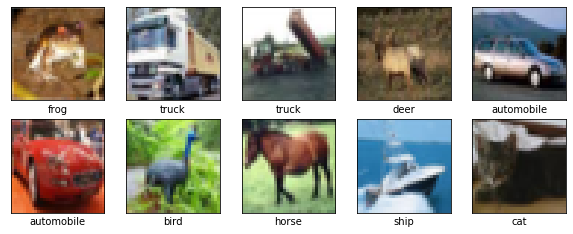

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(debug_data_length):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Train

In [19]:
model = model_builder_dict[model_builder_key]().build_model()

Let's display the architecture of our model so far.

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                65600     
__________

In [21]:

history = model.fit(train_images, 
                    train_labels,
                    epochs=train_epochs, 
                    validation_data=(test_images, test_labels)
                   )

Train on 10 samples, validate on 10 samples
Epoch 1/30
10/10 [==============================] - 0s 25ms/sample - loss: 2.3186 - acc: 0.1000 - val_loss: 2.3135 - val_acc: 0.0000e+00
Epoch 2/30
10/10 [==============================] - 0s 3ms/sample - loss: 2.2267 - acc: 0.5000 - val_loss: 2.3607 - val_acc: 0.0000e+00
Epoch 3/30
10/10 [==============================] - 0s 2ms/sample - loss: 2.1570 - acc: 0.2000 - val_loss: 2.4197 - val_acc: 0.0000e+00
Epoch 4/30
10/10 [==============================] - 0s 3ms/sample - loss: 2.0753 - acc: 0.2000 - val_loss: 2.5096 - val_acc: 0.0000e+00
Epoch 5/30
10/10 [==============================] - 0s 3ms/sample - loss: 1.9905 - acc: 0.2000 - val_loss: 2.6254 - val_acc: 0.0000e+00
Epoch 6/30
10/10 [==============================] - 0s 2ms/sample - loss: 1.9014 - acc: 0.2000 - val_loss: 2.6843 - val_acc: 0.0000e+00
Epoch 7/30
10/10 [==============================] - 0s 3ms/sample - loss: 1.7947 - acc: 0.2000 - val_loss: 2.6439 - val_acc: 0.1000
Epoch 8

In [22]:
history.history

{'loss': [2.3186163902282715,
  2.2267086505889893,
  2.156980037689209,
  2.0752720832824707,
  1.9905322790145874,
  1.901447057723999,
  1.7946960926055908,
  1.6676372289657593,
  1.5388524532318115,
  1.3992836475372314,
  1.2405879497528076,
  1.0788215398788452,
  0.9157945513725281,
  0.753377377986908,
  0.5965182185173035,
  0.46431270241737366,
  0.33942753076553345,
  0.24868230521678925,
  0.1723739504814148,
  0.1182636022567749,
  0.07609571516513824,
  0.05365975946187973,
  0.03353934735059738,
  0.022433649748563766,
  0.014963050372898579,
  0.01044496987015009,
  0.0064397589303553104,
  0.004334799945354462,
  0.0031730798073112965,
  0.00223098648712039],
 'acc': [0.1,
  0.5,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.4,
  0.7,
  0.7,
  0.8,
  0.8,
  0.8,
  0.9,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [2.313528060913086,
  2.3607449531555176,
  2.419717311859131,
  2.509636878967285,

# Eval

 - 0s - loss: 10.6026 - acc: 0.0000e+00


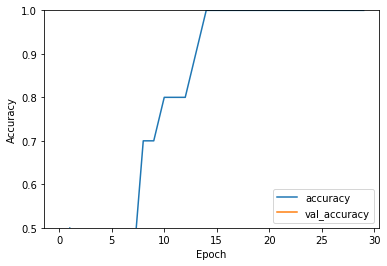

In [23]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)